<a href="https://colab.research.google.com/github/Junior40/Python-DataScience/blob/lesson6_Sclearn/Sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Обучение с учителем в Scikit-learn.
Задание 1.

In [2]:
import warnings
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

warnings.filterwarnings('ignore')

In [3]:
boston = load_boston()
target = boston["target"]
X = pd.DataFrame(boston["data"], columns=boston["feature_names"])
y = pd.DataFrame(boston["target"], columns=["price"])


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [5]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lin = lr.predict(X_test)
R2_lin = r2_score(y_test, y_pred_lin)
R2_lin

0.7112260057484974

Задание 2.

In [6]:
model = RandomForestRegressor(n_estimators=1000, max_depth=12, random_state=42)
model.fit(X_train, y_train.values[:, 0])
y_pred_rfr = model.predict(X_test)
R2_rfr = r2_score(y_test, y_pred_rfr)
R2_rfr

0.8749965273218174

По результатам расчета коэффициента детерминации r2 двух моделей регрессии обобщающая способность выше у алгоритма случайного леса (0,87), чем у линейного (0,71)

Задание 3.

In [7]:
RandomForestRegressor.feature_importances_.__doc__

'\n        Return the feature importances (the higher, the more important the\n           feature).\n\n        Returns\n        -------\n        feature_importances_ : array, shape = [n_features]\n            The values of this array sum to 1, unless all trees are single node\n            trees consisting of only the root node, in which case it will be an\n            array of zeros.\n        '

In [8]:
np.sum(model.feature_importances_)  #сумма всех показателей важности, стремится к 1

0.9999999999999999

In [9]:
importances = model.feature_importances_

<BarContainer object of 13 artists>

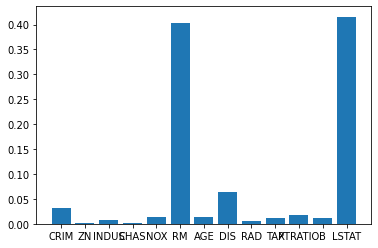

In [10]:
feature_importance = pd.Series(importances, index=boston["feature_names"])
plt.bar(feature_importance.index, feature_importance)

Наибольшую важность представляют признаки "LSTAT" и "RM"

Задание 4

In [33]:
path_csv = "/content/drive/MyDrive/Colab Notebooks/creditcard.csv"
data = pd.read_csv(path_csv)
df = pd.DataFrame(data)
pd.options.display.max_columns = 100

In [34]:
df.value_counts(normalize=True)

Time      V1          V2          V3         V4         V5         V6         V7          V8          V9         V10        V11        V12        V13        V14        V15        V16        V17        V18        V19        V20        V21         V22        V23        V24        V25        V26        V27        V28        Amount  Class
163152.0  -1.203617    1.574009    2.889277   3.381404   1.538663   3.698747   0.560211   -0.150911    0.124136   4.220998   1.384569  -0.706897  -0.256274  -1.562583   1.692915  -0.787338  -0.226776  -0.412354   0.234322   1.385597  -0.366727    0.522223  -0.357329  -0.870174  -0.134166   0.327019  -0.042648  -0.855262  1.51    0        0.000063
          -1.196037    1.585949    2.883976   3.378471   1.511706   3.717077   0.585362   -0.156001    0.122648   4.217934   1.385525  -0.709405  -0.256168  -1.564352   1.693218  -0.785210  -0.228008  -0.412833   0.234834   1.375790  -0.370294    0.524395  -0.355170  -0.869790  -0.133198   0.327804  -0.035702  -0

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Пропусков нет, все данные в числовых форматах

In [57]:
X = df.drop(['Class'], axis=1)
y = df['Class']
y.astype('int8')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)

In [58]:
parameters = [{'n_estimators': [10, 15],
'max_features': np.arange(3, 5),
'max_depth': np.arange(4, 7)}]
clf = GridSearchCV(
    estimator=RandomForestClassifier(random_state=100),
    param_grid=parameters,
    scoring='roc_auc',
    cv=3)

In [59]:
clf.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=100,
                                 

In [61]:
clf.best_params_

{'max_depth': 6, 'max_features': 3, 'n_estimators': 15}

In [76]:
y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)[:, 1]
y_pred_proba

array([0.00092917, 0.00029521, 0.00028215, ..., 0.00028215, 0.0006822 ,
       0.01246098])

In [78]:
AUC = roc_auc_score(y_test, y_pred_proba)
AUC

0.9462664156037156